In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
df = pd.read_csv("census.csv")

data.shape
# Success - Display the first record
display(df.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [10]:
n_records = df.shape[0]

n_greater_50k=(df['income']=='>50K').sum()

n_at_most_50k = (df['income']=='<=50K').sum()

greater_percent = (n_greater_50k/n_records)*100

print('Total number of records {}'.format(n_records))

print("Individuals making more than $50,000: {}".format(n_greater_50k))

print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [12]:
df.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [13]:
income_raw = df['income']
feature_raw = df.drop('income',axis=1)

In [33]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()



In [28]:
import matplotlib.pyplot as pl
def distribution(data,transformed=False):
    fig=pl.figure(figsize=(10,5))
    
    for i, feat in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1,2,i+1)
        ax.hist(df[feat],bins=25,color='#00A0A0')
        ax.set_title('%s feature distribution'%(feat),fontsize = 14)
        ax.set_xlabel('value')
        ax.set_ylabel('num of records')
        ax.set_ylim((0,2000))
        ax.set_yticks([0,500,1000,1500,2000])
        ax.set_yticklabels([0,500,1000,1500,'>2000'])
        
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",\
                    fontsize=16,y=1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features",\
                    fontsize=16,y=1.03)
    fig.tight_layout()
    fig.show()

C:\Users\sidha\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


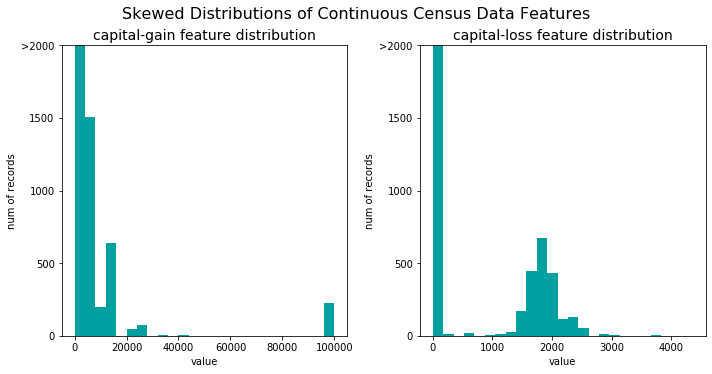

In [29]:
distribution(data)

In [30]:
skewed = ['capital-gain', 'capital-loss']

feat_log = pd.DataFrame(data=feature_raw)
feat_log[skewed] = feature_raw[skewed].apply(lambda x:np.log(x+1))
#np.log(feature_raw[skewed]+1)

C:\Users\sidha\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


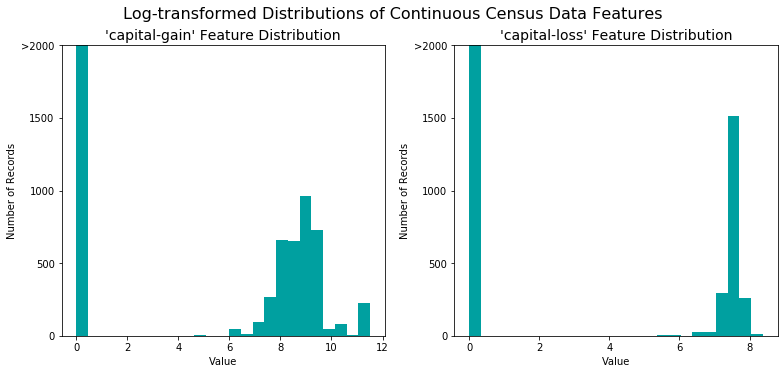

In [34]:
distribution(feat_log,transformed=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

feat = pd.DataFrame(data=feat_log)
feat[numerical]=sc.fit_transform(feat_log[numerical])

In [39]:
feat.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [40]:
income_raw.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [42]:
feat_final = pd.get_dummies(feat)
target = income_raw.apply(lambda x:1 if x=='>50K' else 0)

In [44]:
col = len(feat_final.columns)
print(col)

103


In [46]:
print(list(feat_final.columns))

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', '

In [47]:
feat_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(feat_final,target,test_size=0.2,random_state=5)

x_train.shape,x_test.shape

((36177, 103), (9045, 103))

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In [53]:
tp = np.sum(target)
fp = n_records - tp
tn = 0
fn = 0

acc = (tp+tn)/(tp+tn+fp+fn)
rec = tp/(tp+fn)
pre = tp/(tp+fp)
beta = 0.5
fb = (1+beta**2)*((pre*rec)/((beta**2*pre)+rec))
print(acc,fb)

0.2478439697492371 0.29172913543228385


In [57]:
x = feat_final
y = target

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api  as     sm
import scipy.stats   as     stats
from   sklearn   import datasets
from   sklearn.metrics import mean_squared_error
from   sklearn.preprocessing import PolynomialFeatures
from   sklearn.linear_model import LinearRegression
from   sklearn  import linear_model
from   sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc,fbeta_score
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [61]:
#ensemble  models
adaboost = ensemble.AdaBoostClassifier()
bag = ensemble.BaggingClassifier()
extratree = ensemble.ExtraTreesClassifier()
gbboost = ensemble.GradientBoostingClassifier()
rf = ensemble.RandomForestClassifier()

#Gaussian Process

gpc = gaussian_process.GaussianProcessClassifier()

#GLM

log = linear_model.LogisticRegressionCV()
pac = linear_model.PassiveAggressiveClassifier()
ridge = linear_model.RidgeClassifierCV()
sgd = linear_model.SGDClassifier()
perceptron = linear_model.Perceptron()

#Naive Bayes


nb = naive_bayes.BernoulliNB()
nb_gaussian = naive_bayes.GaussianNB()

#knn

knn = neighbors.KNeighborsClassifier()

#svm

sv = SVC(probability=True)
linsvc = LinearSVC()

#Trees

dt = tree.DecisionTreeClassifier()
et = tree.ExtraTreeClassifier()


#Discriminant Analysis 

lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()


#xgboost

xg = XGBClassifier()


In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)
model = [adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg]
MLA_columns = ['MLA Name','MLA Parameters','AUC score','Bias error','Variance error']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index=0
roc_auc=[]

for alg in model:
    for train,test in kf.split(x,y):
        x_train,x_test = x.iloc[train,:],x.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        alg.fit(x_train,y_train)
        y_pred = alg.predict(x_test)
        
        fpr,tpr,_ = roc_curve(y_test,y_pred)
        roc_auc.append(auc(fpr,tpr))
    
    mla_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']= mla_name
    MLA_compare.loc[row_index,'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row_index, 'AUC score'] = np.mean(roc_auc)
    MLA_compare.loc[row_index, 'Bias  error'] = (1-np.mean(roc_auc))*100
    MLA_compare.loc[row_index, 'Variance error'] = (np.var(roc_auc,ddof=1))*10000
    
    row_index +=1
    
MLA_compare.sort_values(by=['AUC score'],ascending=False,inplace=True)
MLA_compare    

In [68]:
x.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45222, 103), (45222,), (36177, 103), (9045, 103), (36177,), (9045,))

In [ ]:
model = [adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg]
MLA_columns = ['MLA Name','MLA Parameters','AUC score','F-Beta score']

kf = KFold(n_splits=5,shuffle=True,random_state=0)

MLA_compare = pd.DataFrame(columns = MLA_columns)

roc_auc=[]
f1=[]
fb=[]
acc=[]
row=0
for alg in model:
    for train,test in kf.split(x,y):
        x_train,x_test = x.iloc[train,:],x.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        alg.fit(x_train,y_train)
        y_ = alg.predict(x_test)
        
        fpr,tpr,_ = roc_curve(y_test,y_)
        roc_auc.append(auc(fpr,tpr))
        #f1.append(f1_score(y_test,y_))
        fb.append(fbeta_score(y_test,y_,beta=0.5))
        #acc.append(accuracy_score(y_test,y_))
       
        
    mla_name = alg.__class__.__name__
    MLA_compare.loc[row,'MLA Name'] = mla_name
    MLA_compare.loc[row,'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row,'AUC score'] = np.mean(roc_auc)
    #MLA_compare.loc[row,'F1 score'] = f1
    MLA_compare.loc[row,'F-Beta score'] = fb
    #MLA_compare.loc[row,'Accuracy'] = acc
    row += 1
    
MLA_compare.sort_values(by='AUC score',ascending=False,inplace=True)
MLA_compare      

Text(0, 0.5, 'Algorithm')

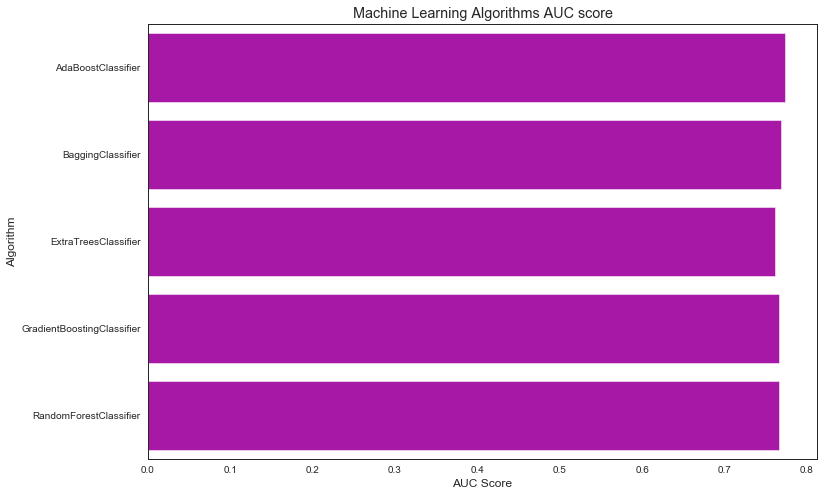

In [70]:
sns.barplot(x='AUC score',y='MLA Name',data=MLA_compare,color='m')
plt.title('Machine Learning Algorithms AUC score')
plt.xlabel('AUC Score')
plt.ylabel('Algorithm')

In [75]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
fb = fbeta_score(y_test,y_pred,beta=0.5)

print('BEFORE DT Parameters: ', dt.get_params())
print("BEFORE DT Training fb: {:.2f}".format(fb))

param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

tn = GridSearchCV(dt,param_grid=param_grid,cv=3,scoring='roc_auc')
tn.fit(x_train,y_train)
y_ = tn.predict(x_test)
fb = fbeta_score(y_test,y_pred,beta=0.5)

print('After DT Parameters: ', dt.get_params())
print("After DT Training fb: {:.2f}".format(fb))

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
BEFORE DT Training fb: 0.62
After DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
After DT Training fb: 0.62


In [86]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [77]:
a = x.columns

In [88]:
mod = AdaBoostClassifier(random_state=42)
param = {'n_estimators':[50,100,200,300,500],
        'learning_rate':[0.001,0.01,0.1,1,1.2,1.5,1.7,10],
        'algorithm':['SAMME','SAMME.R']}
fb = make_scorer(fbeta_score,beta=0.5)
grid = GridSearchCV(mod,param_grid=param,scoring=fb)
gri=grid.fit(x_train,y_train)
best = gri.best_estimator_


TypeError: fit() missing 1 required positional argument: 'y'

In [92]:
pred = mod.fit(x_train,y_train).predict(x_test)
best_pred = best.predict(x_test)
print(fbeta_score(y_test,pred,beta=0.5))
print(fbeta_score(y_test,best_pred,beta=0.5))

0.7245508982035928
0.7462213296691681


In [93]:
model = AdaBoostClassifier().fit(x_train,y_train)
bestfeat = model.feature_importances_

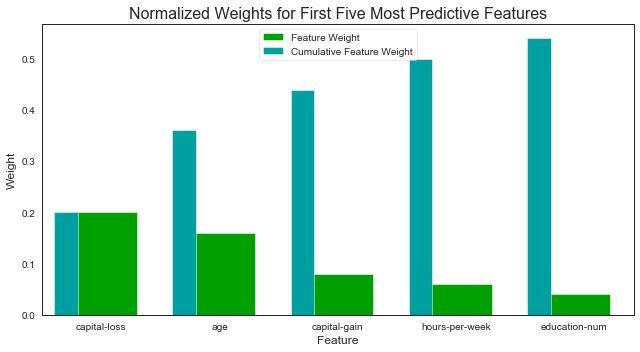

In [94]:
vs.feature_plot(bestfeat,x_train,y_train)

In [124]:
def feature_plot(importance,x_train,y_train):
    
    ind = np.argsort(importance)[::-1]
    col = x_train.columns.values[ind[:5]]
    val = importance[ind][:5]
    
    fig = pl.figure(figsize=(15,8))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), val, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(val), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), col)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    pl.legend(loc='upper center')
    pl.tight_layout()
    pl.show()

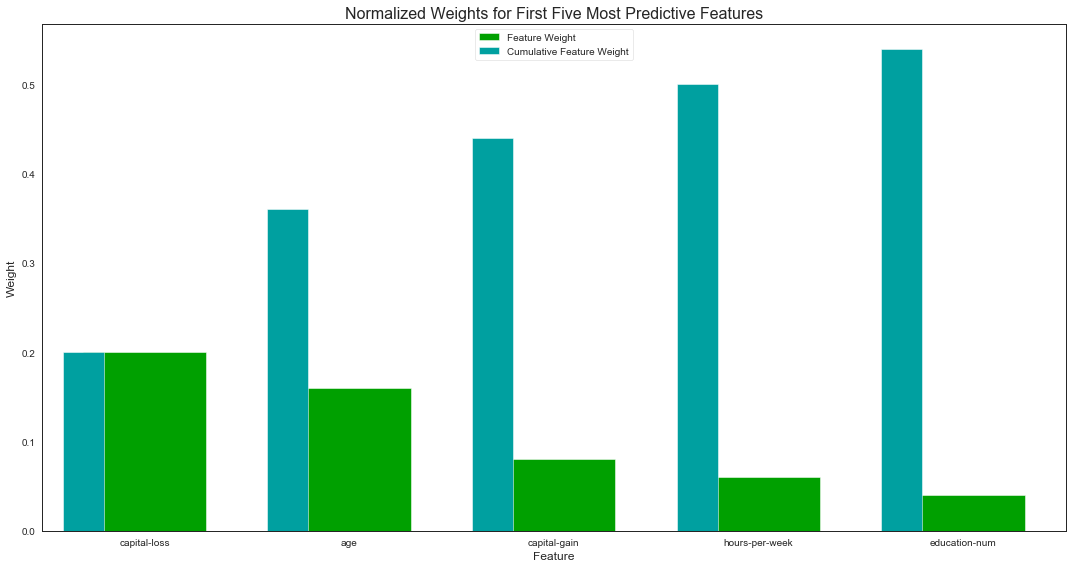

In [125]:
feature_plot(bestfeat,x_train,y_train)

In [129]:
x_t = x_train[x_train.columns.values[np.argsort(bestfeat)[::-1][:5]]]
x_te = x_test[x_test.columns.values[np.argsort(bestfeat)[::-1][:5]]]

a=best.fit(x_train,y_train)
y_ = a.predict(x_test)
print(fbeta_score(y_test,y_,beta=0.5))
b=best.fit(x_t,y_train)
y_pred = b.predict(x_te)
print(fbeta_score(y_test,y_pred,beta=0.5))

0.7462213296691681
0.7009282927485537
